In [1]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('spam.csv',  encoding = 'latin-1')

In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df.shape

(5572, 5)

1. Data Cleaning
2. EDA
3. Text Preprocessing
4. Model Bulding
5. Evaluation
6. Improvements

DATA CLEANING

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [10]:
#Drop last 3 columns because so many Nan values are there in last 3 columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [11]:
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#Columns name are not that much informative so i change the name of columns
df.rename(columns={'v1':'target', 'v2':'message'}, inplace=True)
df.head(2)

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [16]:
#My task is of classification so i have to encode the targeted column in 0 and 1 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [17]:
df.head(2)

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...


In [19]:
#Check for missing values
df.isnull().sum()

target     0
message    0
dtype: int64

In [20]:
#Check for Duplicate Values
df.duplicated().sum()

403

In [21]:
#Remove Duplicates
df = df.drop_duplicates(keep='first')

In [22]:
df.duplicated().sum()

0

EDA

In [24]:
#I have to check ratio of Spam messages and Ham messages 0-ham and 1-spam
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

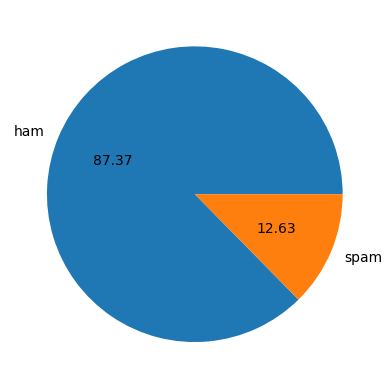

In [25]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

From above pie chart i can say that data is imbalanced

In [26]:
!pip install nltk

  Obtaining dependency information for nltk from https://files.pythonhosted.org/packages/a6/0a/0d20d2c0f16be91b9fa32a77b76c60f9baf6eba419e5ef5deca17af9c582/nltk-3.8.1-py3-none-any.whl.metadata
  Obtaining dependency information for regex>=2021.8.3 from https://files.pythonhosted.org/packages/a8/01/18232f93672c1d530834e2e0568a80eaab1df12d67ae499b1762ab462b5c/regex-2023.12.25-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 42.0/42.0 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ----- ---------------------------------- 0.2/1.5 MB 3.9 MB/s eta 0:00:01
   ---------- ----------------------------- 0.4/1.5 MB 3.9 MB/s eta 0:00:01
   ----------------------- ---------------- 0.9/1.5 MB 7.0 MB/s eta 0:00:01
   ------------------------- -------------- 1.0/1.5 MB 5.0 MB/s eta 0:00:01
   ------------------------- -------------- 1.0/1.5 MB 5.0 MB/s


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import nltk

In [29]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AKSHAT\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

I have to make New Data in which i need
No of Character
No of Word

In [31]:
#fetch No of character in each sentence
df['nof_characters']=df['message'].apply(len)

In [34]:
#fetch No of Words
df['nof_words']=df['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [37]:
#fetch No of Sentences
df['nof_sentences']=df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [38]:
df.head()

,target,message,nof_characters,nof_words,nof_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [40]:
df[['nof_characters', 'nof_words', 'nof_sentences']].describe()

,nof_characters,nof_words,nof_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [41]:
#check for ham messages
df[df['target']==0][['nof_characters', 'nof_words', 'nof_sentences']].describe()

,nof_characters,nof_words,nof_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [42]:
#check for spam messages
df[df['target']==1][['nof_characters', 'nof_words', 'nof_sentences']].describe()

,nof_characters,nof_words,nof_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


in Spam Messages No of Words are more then ham messages

In [43]:
#See that using Histogram
import seaborn as sns

<Axes: xlabel='nof_characters', ylabel='Count'>

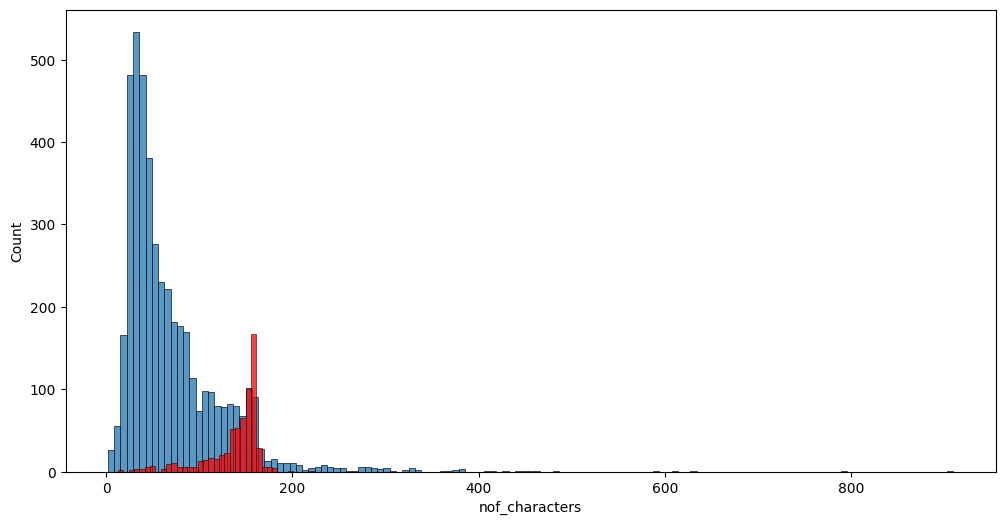

In [48]:
plt.figure(figsize=[12,6])
sns.histplot(df[df['target']==0]['nof_characters'])
sns.histplot(df[df['target']==1]['nof_characters'], color='red')

<Axes: xlabel='nof_words', ylabel='Count'>

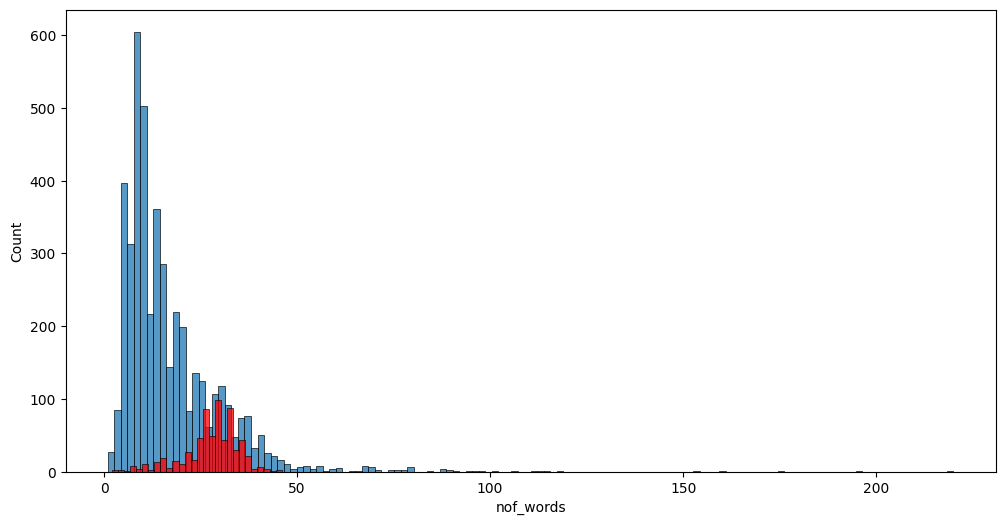

In [49]:
#histogram for words
plt.figure(figsize=[12,6])
sns.histplot(df[df['target']==0]['nof_words'])
sns.histplot(df[df['target']==1]['nof_words'], color='red')

c:\Users\AKSHAT\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


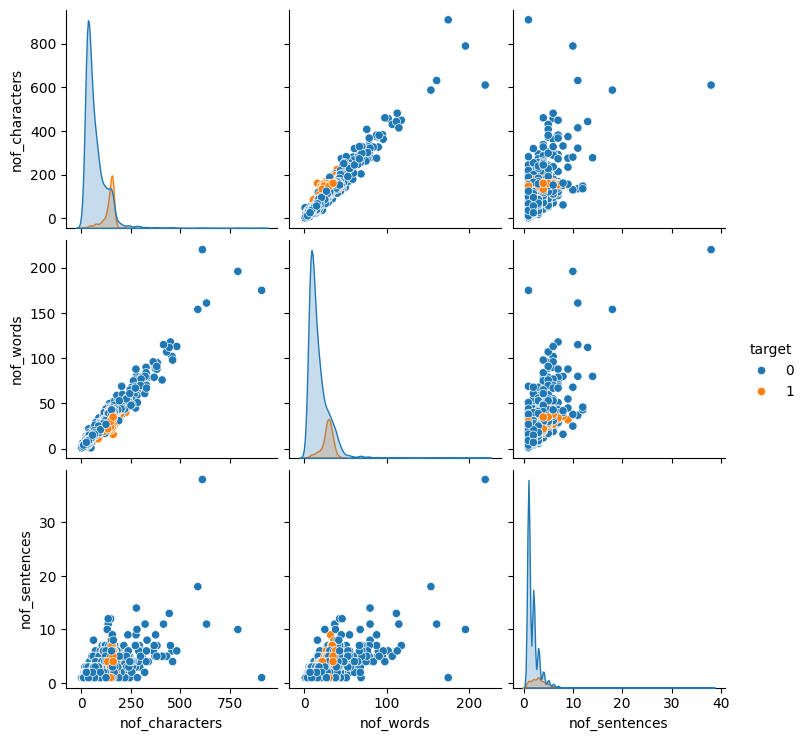

In [50]:
#See the relation between columns using pairplot
sns.pairplot(df, hue='target')

In [53]:
df.head()

,target,message,nof_characters,nof_words,nof_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


<Axes: >

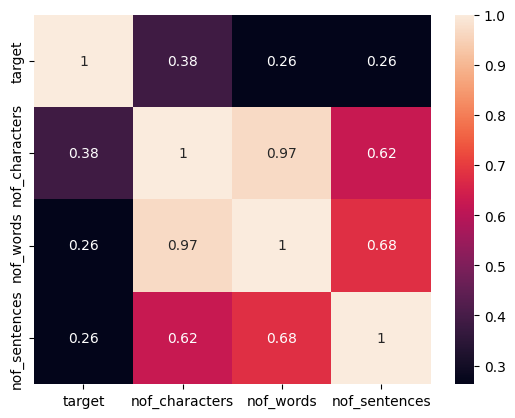

In [56]:
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True)

Text Preprocessing

Lower case, Tokenization, Removing Special Characters, Removing Stop words and punctuation, Stemming

In [71]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AKSHAT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [72]:
#removing stop words and punctuation
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [74]:
#puncuation words
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [81]:
#Stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('Dancing')

'danc'

In [84]:
def text_processing(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)

In [87]:
text_processing('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [86]:
df['message'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [88]:
#Now i make a new column of transformed text
df['transformed_message'] = df['message'].apply(text_processing)

In [89]:
df.head()

,target,message,nof_characters,nof_words,nof_sentences,transformed_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


making wordcloud of ham and spam that shows the all important words in respective category

In [90]:
!pip install wordcloud


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   --------------- ------------------------ 112.6/300.2 kB 3.3 MB/s eta 0:00:01
   ---------------------------------------  297.0/300.2 kB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 2.7 MB/s eta 0:00:00


In [94]:

from wordcloud import WordCloud
wcc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

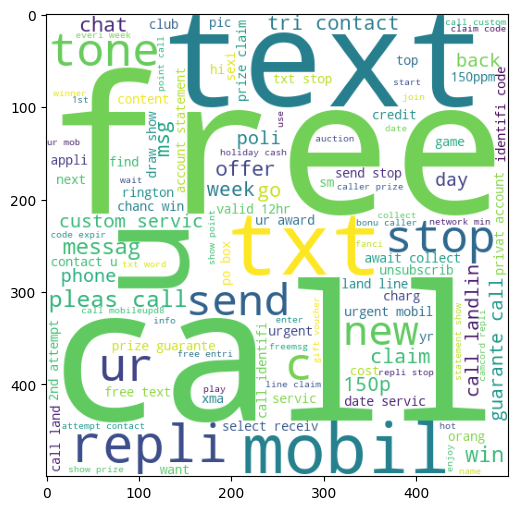

In [98]:
#wordcount of spam
plt.figure(figsize=(15,6))
spam_wordcount=wcc.generate(df[df['target']==1]['transformed_message'].str.cat(sep=" "))
plt.imshow(spam_wordcount)

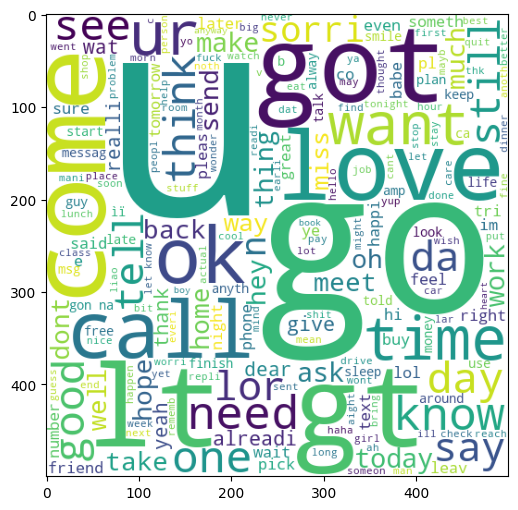

In [99]:
#wordcount of ham
plt.figure(figsize=(15,6))
ham_wordcount=wcc.generate(df[df['target']==0]['transformed_message'].str.cat(sep=" "))
plt.imshow(ham_wordcount)

In [110]:
#Top 30 words used in ham and spam
spam = []
for msg in df[df['target']==1]['transformed_message'].tolist():
    for word in msg.split():
        spam.append(word)

In [109]:
len(spam)

9939

In [113]:
from collections import Counter
Counter(spam).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [111]:
#Top 30 words used in ham and spam
ham = []
for msg in df[df['target']==0]['transformed_message'].tolist():
    for word in msg.split():
        ham.append(word)

In [112]:
len(ham)

35404

In [114]:
Counter(ham).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

Model Bulding

In [115]:
#Here i have texual data so naive bayes is best choice for this data
#For that i have to vactorize the input means transformed_message column

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [116]:
x = cv.fit_transform(df['transformed_message']).toarray()

In [117]:
x.shape

(5169, 6708)

In [118]:
y = df['target'].values

In [119]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=2)

In [122]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [121]:
gNaive = GaussianNB()
mNaive = MultinomialNB()
bNaive = BernoulliNB()

In [123]:
gNaive.fit(x_train, y_train)
y_pred_gnb = gNaive.predict(x_test)
print(accuracy_score(y_test, y_pred_gnb))
print(confusion_matrix(y_test, y_pred_gnb))
print(precision_score(y_test, y_pred_gnb))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [124]:
mNaive.fit(x_train, y_train)
y_pred_mnb = mNaive.predict(x_test)
print(accuracy_score(y_test, y_pred_mnb))
print(confusion_matrix(y_test, y_pred_mnb))
print(precision_score(y_test, y_pred_mnb))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [125]:
bNaive.fit(x_train, y_train)
y_pred_bnb = bNaive.predict(x_test)
print(accuracy_score(y_test, y_pred_bnb))
print(confusion_matrix(y_test, y_pred_bnb))
print(precision_score(y_test, y_pred_bnb))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283
